In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
filename = './logs/2018-12-17_18-58-39-.log'
new_file = './logs/2018-12-17_23-23-09-.log'

In [128]:
df = pd.read_csv(filename, sep='|', header=1, skiprows=1)

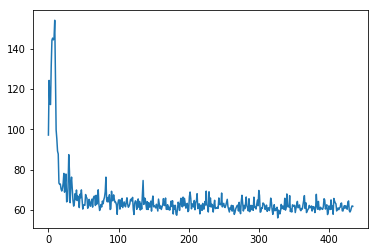

In [131]:
df.head(2)
df[' mean_loss '][0:435].plot()

In [119]:
df2.columns

Index(['        timestamp ', ' epoch ', ' batches_processed ', ' mean_loss ',
       ' segmentation_accuracy ', ' box_IOU_ground ', ' box_IOU_3d ',
       ' box_accuracy ', ' seg_loss ', ' stage1_center_loss ', ' center_loss ',
       ' heading_class_loss ', ' heading_residual_normalized_loss ',
       ' size_class_loss ', ' size_residuals_normalized_loss ',
       ' corner_loss ', ' total_loss'],
      dtype='object')

(465, 17)

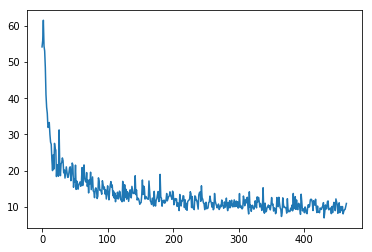

In [135]:
df2 = pd.read_csv(new_file, sep='|', header=1, skiprows=1)
#df2[' total_loss'].plot()
df2[' mean_loss '].plot()
df2.shape

In [133]:
df2.tail()

,timestamp,epoch,batches_processed,mean_loss,segmentation_accuracy,box_IOU_ground,box_IOU_3d,box_accuracy,seg_loss,stage1_center_loss,center_loss,heading_class_loss,heading_residual_normalized_loss,size_class_loss,size_residuals_normalized_loss,corner_loss,total_loss
434,"2018-12-17 23:48:37,617 -",1,2060,9.553301,0.866452,0.617504,0.565170,0.334375,0.306115,0.561608,0.529334,1.166648,0.085847,0.003373,0.061015,0.376408,9.268400
435,"2018-12-17 23:48:41,253 -",1,2070,11.389297,0.872711,0.568547,0.524899,0.284375,0.341691,0.621133,0.865633,1.304614,0.058277,0.003778,0.036030,0.583450,10.857486
436,"2018-12-17 23:48:44,950 -",1,2080,11.635445,0.864410,0.597926,0.555514,0.384375,0.315659,0.920933,1.301105,0.718077,0.080380,0.002868,0.029130,0.779774,13.246572
437,"2018-12-17 23:48:48,636 -",1,2090,9.199010,0.870953,0.615577,0.568567,0.381250,0.255656,0.447040,0.402152,0.939229,0.033348,0.001180,0.025656,0.271813,5.943458
438,"2018-12-17 23:48:52,397 -",1,2100,9.252994,0.880493,0.613922,0.565946,0.359375,0.287771,0.656204,0.752905,0.975377,0.042950,0.001248,0.030171,0.502075,9.156676


In [5]:
df.columns.values

array(['        timestamp ', ' epoch ', ' batches_processed ',
       ' mean_loss ', ' segmentation_accuracy ', ' box_IOU_ground ',
       ' box_IOU_3d ', ' box_accuracy ', ' seg_loss ',
       ' stage1_center_loss ', ' center_loss ', ' heading_class_loss ',
       ' heading_residual_normalized_loss ', ' size_class_loss ',
       ' size_residuals_normalized_loss ', ' corner_loss ', ' total_loss'],
      dtype=object)

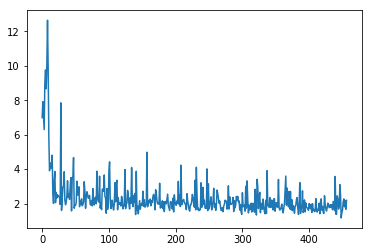

In [18]:
#df[' total_loss'].plot()
df[' stage1_center_loss '].plot()

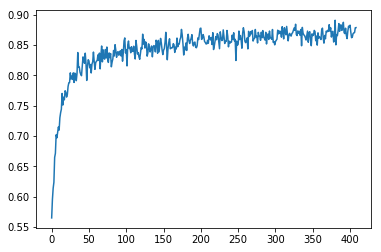

In [7]:
df[' segmentation_accuracy '].plot()

In [123]:
ref_filename = 'logs/run_train-tag-total_loss_1.csv'

In [124]:
ref_df = pd.read_csv(ref_filename)

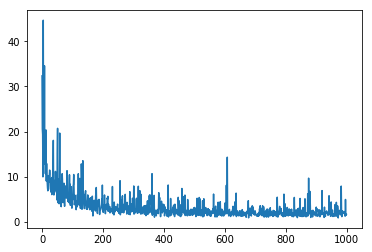

In [126]:
ref_df.Value.plot()
#ref_df

In [27]:
import torch

In [29]:
x = torch.FloatTensor(10,20,4)


In [30]:
x.narrow(2, 0, 3).size()

torch.Size([10, 20, 3])